# System Model

* let the follwoing is the topology of an SDN. 
* The controller is connected to `fe0/0` interface for each OVS names as $r_i$
* hence the adjacency matrix for the given topology would look like

  $\begin{bmatrix}
   0 & 1 & 1 & 0 & 0 & 1\\
   1 & 0 & 0 & 0 & 0 & 1\\
   1 & 0 & 0 & 1 & 1 & 0\\
   0 & 0 & 1 & 0 & 1 & 1\\
   0 & 0 & 1 & 1 & 0 & 0\\
   1 & 1 & 0 & 1 & 0 & 0\\
  \end{bmatrix}$ 

![Figure 1 : Initial Topology](initial_topo.svg)

In [154]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt

%matplotlib inline

lets crete a 2D list useing the adjacency matrix and assign random weight on the edges

In [155]:
b_adj = [[0,1,1,0,0,1],
       [1,0,0,0,0,1],
       [1,0,0,1,1,0],
       [0,0,1,0,1,1],
       [0,0,1,1,0,0],
       [1,1,0,1,0,0]]
node_count=6
'''
input  : a binary adjacency matrix (b_adj))
output : a random weight adjacency matrix (r_adj) wrt b_adj  
'''
def generate_random_weight_graph(adj):
    random_adj=[]
    
    for rows in adj:
        temp_row=[]
        for elem in rows:
            if elem == 1:
                temp_row.append(random.randint(1,10))
            else:
                temp_row.append(0)
        random_adj.append(temp_row)
    
    return random_adj

r_adj = generate_random_weight_graph(b_adj)
pd.DataFrame(r_adj)

,0,1,2,3,4,5
0,0,7,7,0,0,8
1,3,0,0,0,0,3
2,4,0,0,7,2,0
3,0,0,4,0,6,5
4,0,0,8,4,0,0
5,3,10,0,3,0,0


now supply `r_adj` to `NetworkX` library to graw a graph 

   0  1  2  3  4  5
0  0  8  4  0  0  5
1  7  0  0  0  0  8
2  9  0  0  2  8  0
3  0  0  9  0  8  3
4  0  0  8  4  0  0
5  3  3  0  1  0  0


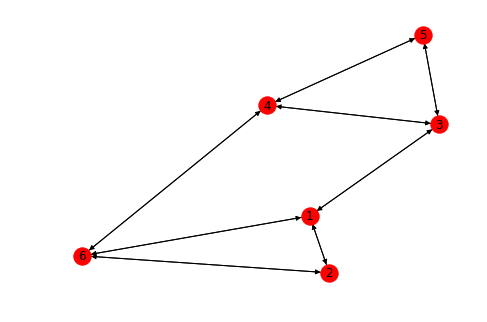

In [157]:
r_adj = generate_random_weight_graph(b_adj)
G = nx.MultiDiGraph()
def add_edges(graph, adj):
    for i in range(len(adj)):
        for j in range(len(adj[i])):
            if adj[i][j] != 0:
                graph.add_edge(i+1,j+1,weight=adj[i][j])
            else:
                pass
                
add_edges(G,r_adj)
print(pd.DataFrame(r_adj))
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)

each node here is an acting OVS hence they have some sort of utilization. `generate_random_util()` function rakes the `r_adj`, generates some random utilization factors and modifies it into another `r_n_adj` 

In [153]:
def generate_random_util(adj):
    r_n_adj = list(adj)
    node_prop = [ 
                    {'ip' : '10.0.0.1', 'util' : random.randint(0,100)},
                    {'ip' : '10.0.0.2', 'util' : random.randint(0,100)},
                    {'ip' : '10.0.0.3', 'util' : random.randint(0,100)},
                    {'ip' : '10.0.0.4', 'util' : random.randint(0,100)},
                    {'ip' : '10.0.0.5', 'util' : random.randint(0,100)},
                    {'ip' : '10.0.0.6', 'util' : random.randint(0,100)}
                ]
    for i in range(len(node_prop)):
        r_n_adj[i][i] = node_prop[i]['util']
    return r_n_adj 

print(pd.DataFrame(r_adj))
'''
r_n_adj=generate_random_util(r_adj)

for i in node_prop:
    print(i)
pd.DataFrame(r_n_adj)
'''

    0   1   2   3  4   5
0  30  10   9   0  0   9
1   5  52   0   0  0   9
2   4   0  17   3  2   0
3   0   0   7  49  7  10
4   0   0   2   4  8   0
5   7   6   0   9  0  96


'\nr_n_adj=generate_random_util(r_adj)\n\nfor i in node_prop:\n    print(i)\npd.DataFrame(r_n_adj)\n'

   0  1  2  3  4  5
0  0  1  1  0  0  1
1  1  0  0  0  0  1
2  1  0  0  1  1  0
3  0  0  1  0  1  1
4  0  0  1  1  0  0
5  1  1  0  1  0  0 
-------------------------------
    0   1   2   3   4   5
0   5   9   1   0   0   2
1  10  54   0   0   0   6
2   1   0  47  10   6   0
3   0   0  10  79   8   1
4   0   0   5   4  14   0
5   4   1   0   8   0  84 
-------------------------------
    0   1   2   3   4   5
0   5   9   1   0   0   2
1  10  54   0   0   0   6
2   1   0  47  10   6   0
3   0   0  10  79   8   1
4   0   0   5   4  14   0
5   4   1   0   8   0  84 
-------------------------------


"\nG.graph['edge'] = {'splines' : 'curved'}\n\nA = to_agraph(G)\nA.layout('dot')\nA.draw()\n"

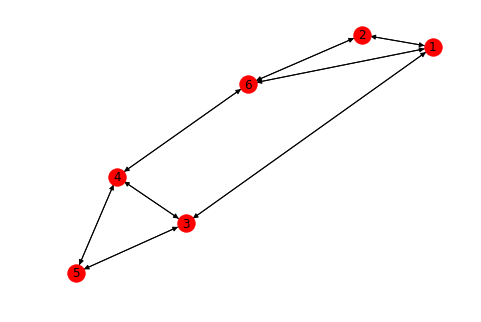

In [159]:
r_adj = generate_random_weight_graph(b_adj)
r_n_adj= generate_random_util(r_adj)

G = nx.DiGraph()

def add_edges(graph, adj):
    for i in range(len(adj)):
        for j in range(len(adj[i])):
            if adj[i][j] != 0:
                graph.add_edge(i+1,j+1,weight=adj[i][j])
            else:
                pass
                
add_edges(G,r_n_adj)

print(f'{pd.DataFrame(b_adj)} \n-------------------------------')
print(f'{pd.DataFrame(r_adj)} \n-------------------------------')
print(f'{pd.DataFrame(r_n_adj)} \n-------------------------------')

nx.draw(G, with_labels=True)

'''
G.graph['edge'] = {'splines' : 'curved'}

A = to_agraph(G)
A.layout('dot')
A.draw()
'''

AttributeError: 'AtlasView' object has no attribute 'degree'

In [2]:
import random
matrix = [[0,1,0,0,1,1],
          [1,0,1,1,0,0],
          [0,1,0,1,0,1],
          [0,1,1,0,0,0],
          [1,0,0,0,0,1],
          [1,0,1,0,1,0]]

def print_matrix(title, matrix):
    print(title)
    for row in matrix:
        print(row)
    
def get_adjacect_index(matrix):
    adj_indx=[]
    for row in matrix:
        index_row=[]
        for elem in range(len(row)):
            if row[elem] == 1:
                index_row.append(elem)
        adj_indx.append(index_row)
    return adj_indx

def get_random_affinity(matrix):
    rand_temp=[]
    for row in matrix:
        temp=[]
        for i in range(len(row)):
            temp.append(random.randint(0,100))
        print(temp)
        for elem in temp:
            elem = ((elem - min(temp))/(max(temp) - min(temp)))
        print(temp)
        rand_temp.append(temp)
    return rand_temp
     
        
               
#print_matrix('adjacency', matrix)
#print_matrix('adj_index',adj_indx)

print_matrix('random_affinity',get_random_affinity(get_adjacect_index(matrix)))



[13, 40, 42]
[13, 40, 42]
[39, 71, 31]
[39, 71, 31]
[87, 38, 67]
[87, 38, 67]
[60, 69]
[60, 69]
[79, 94]
[79, 94]
[74, 97, 54]
[74, 97, 54]
random_affinity
[13, 40, 42]
[39, 71, 31]
[87, 38, 67]
[60, 69]
[79, 94]
[74, 97, 54]


[1, 4, 5]
[0, 2, 3]
[1, 3, 5]
[1, 2]
[0, 5]
[0, 2, 4]


In [22]:
import numpy as np
import pandas as pd

a=[[13, 0, 42],
[13, 40, 0],
[39, 71, 31],
[0, 0, 31],
[87, 38, 0],
[87, 0, 67]]

mat = np.matrix(a)
print(mat)

size = mat.shape[0] * mat.shape[1]
arr=mat.reshape(size)
#print(arr)

indx=np.where(arr != 0)[1]
print(indx)

[[13  0 42]
 [13 40  0]
 [39 71 31]
 [ 0  0 31]
 [87 38  0]
 [87  0 67]]
[ 0  2  3  4  6  7  8 11 12 13 15 17]
